<a href="https://colab.research.google.com/github/jmcaussade/Analitica-textual-con-ML-tarea2/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2

Integrantes:
- Jean Michel Caussade
- Sebatian Bobenrieth
- Juan Pablo Gazmuri

## Instalación de librerías

In [1]:
!python -m spacy download es_core_news_sm

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes, linear_model, svm, ensemble, tree, neural_network
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
from collections import Counter
from math import log
import spacy
from tqdm.notebook import tqdm
tqdm.pandas()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 19.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Conexión Google Collab


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importamos archivo .pkl del laboratorio 1

In [6]:
# ruta_data_set = '/content/drive/My Drive/2024-02/Analitica_textual_con_ML/Tarea2/COAH_dataset.xlsx'
# df_dataset = pd.read_excel(ruta_data_set)

ruta_pickle = '/content/drive/My Drive/2024-02/Analitica_textual_con_ML/Tarea2ML/df_procesadoOficial.pkl'
#ruta_pickle = '/content/drive/My Drive/Tarea2/df_procesadoOficial.pkl'
df = pd.read_pickle(ruta_pickle)

In [7]:
df

,id,rank,abstract,review,processed_review,filtered_words,token_count,joined_text
0,1,2,Un hotel digno de mención!,Como bien les comenté a los propietarios a la ...,"[bien, comente, propietarios, hora, abandonar,...","[hora, momento, vez, granada, situacion, centr...",76,hora momento vez granada situacion centro gran...
1,2,2,"Recomendable 100%, sin lujos pero todo perfecto.","Estuvimos dos días con mi familia, reservando ...","[dias, familia, reservando, habitaciones, desa...","[dias, familia, incluido, incluso, parking, es...",84,dias familia incluido incluso parking estancia...
2,3,1,Decepción,Habíamos escogido este hotel por las buenas op...,"[escogido, hotel, buenas, opiniones, verdad, h...","[buenas, verdad, centro, hacia, ruido, poder, ...",53,buenas verdad centro hacia ruido poder suelo p...
3,4,2,"Por segunda vez, inmejorable",Hemos vuelto por segunda vez a este estupendo ...,"[vuelto, segunda, vez, estupendo, hotel, grana...","[vez, estupendo, granada, relacion, calidad, p...",47,vez estupendo granada relacion calidad precio ...
4,5,2,No tan sorpresa,"He estado dos días en Granada por trabajo, soy...","[dias, granada, trabajo, autonomo, busco, ante...","[dias, granada, elegir, pues, situacion, cerca...",91,dias granada elegir pues situacion cerca grana...
...,...,...,...,...,...,...,...,...
1811,1812,2,remanso de paz en el corazón de Córdoba,Hemos empezado el año con una estancia de tres...,"[empezado, ano, estancia, tres, noches, hotel,...","[estancia, tres, noches, lugar, tranquilo, tra...",116,estancia tres noches lugar tranquilo trato com...
1812,1813,2,"Oasis de paz, tranquilidad y belleza!",Al atravesar el umbral de la puerta que conduc...,"[atravesar, umbral, puerta, conduce, zaguan, h...","[puerta, olor, natural, patio, patio, calidad,...",242,puerta olor natural patio patio calidad vista ...
1813,1814,2,Un lugar para recordar,En este hotel todo son sensaciones y experienc...,"[hotel, sensaciones, experiencias, positivas, ...","[ubicado, antigua, calle, ahora, junto, zona, ...",109,ubicado antigua calle ahora junto zona gran ha...
1814,1815,2,Extraordinario,Hemos pasado un par de noches en este exquisit...,"[pasado, par, noches, exquisito, hotel, regent...","[pasado, par, noches, trato, primera, planta, ...",31,pasado par noches trato primera planta cama gu...


# Preprocesamiento final

##Lematización

In [8]:
lematizador = spacy.load("es_core_news_sm")

def lematizar(texto):
    palabras_lematizadas = [palabra.lemma_ for palabra in lematizador(" ".join(texto))]
    return palabras_lematizadas

df['comentario_tokenizado_lema'] = df['processed_review'].progress_apply(lematizar)
df

  0%|          | 0/1816 [00:00<?, ?it/s]

,id,rank,abstract,review,processed_review,filtered_words,token_count,joined_text,comentario_tokenizado_lema
0,1,2,Un hotel digno de mención!,Como bien les comenté a los propietarios a la ...,"[bien, comente, propietarios, hora, abandonar,...","[hora, momento, vez, granada, situacion, centr...",76,hora momento vez granada situacion centro gran...,"[bien, comente, propietario, hora, abandonar, ..."
1,2,2,"Recomendable 100%, sin lujos pero todo perfecto.","Estuvimos dos días con mi familia, reservando ...","[dias, familia, reservando, habitaciones, desa...","[dias, familia, incluido, incluso, parking, es...",84,dias familia incluido incluso parking estancia...,"[dia, familia, reservar, habitación, desayunar..."
2,3,1,Decepción,Habíamos escogido este hotel por las buenas op...,"[escogido, hotel, buenas, opiniones, verdad, h...","[buenas, verdad, centro, hacia, ruido, poder, ...",53,buenas verdad centro hacia ruido poder suelo p...,"[escogido, hotel, buena, opinión, verdad, hote..."
3,4,2,"Por segunda vez, inmejorable",Hemos vuelto por segunda vez a este estupendo ...,"[vuelto, segunda, vez, estupendo, hotel, grana...","[vez, estupendo, granada, relacion, calidad, p...",47,vez estupendo granada relacion calidad precio ...,"[volver, segundo, vez, estupendo, hotel, grana..."
4,5,2,No tan sorpresa,"He estado dos días en Granada por trabajo, soy...","[dias, granada, trabajo, autonomo, busco, ante...","[dias, granada, elegir, pues, situacion, cerca...",91,dias granada elegir pues situacion cerca grana...,"[dia, granado, trabajo, autonomo, busco, antel..."
...,...,...,...,...,...,...,...,...,...
1811,1812,2,remanso de paz en el corazón de Córdoba,Hemos empezado el año con una estancia de tres...,"[empezado, ano, estancia, tres, noches, hotel,...","[estancia, tres, noches, lugar, tranquilo, tra...",116,estancia tres noches lugar tranquilo trato com...,"[empezado, ano, estancia, tres, noche, hotel, ..."
1812,1813,2,"Oasis de paz, tranquilidad y belleza!",Al atravesar el umbral de la puerta que conduc...,"[atravesar, umbral, puerta, conduce, zaguan, h...","[puerta, olor, natural, patio, patio, calidad,...",242,puerta olor natural patio patio calidad vista ...,"[atravesar, umbral, puerta, conducir, zaguan, ..."
1813,1814,2,Un lugar para recordar,En este hotel todo son sensaciones y experienc...,"[hotel, sensaciones, experiencias, positivas, ...","[ubicado, antigua, calle, ahora, junto, zona, ...",109,ubicado antigua calle ahora junto zona gran ha...,"[hotel, sensación, experiencia, positivo, come..."
1814,1815,2,Extraordinario,Hemos pasado un par de noches en este exquisit...,"[pasado, par, noches, exquisito, hotel, regent...","[pasado, par, noches, trato, primera, planta, ...",31,pasado par noches trato primera planta cama gu...,"[pasado, par, noche, exquisito, hotel, regenta..."


# Inicio proceso entrenamiento

## Definiciónd datos entrenamiento y validación

In [9]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=1)

## Definición datos con y sin lematización

In [10]:
Train_X = train_df['processed_review'].apply(lambda x: ' '.join(x)).reset_index(drop=True)
Test_X = val_df['processed_review'].apply(lambda x: ' '.join(x)).reset_index(drop=True)

Train_X_lema = train_df['comentario_tokenizado_lema'].apply(lambda x: ' '.join(x)).reset_index(drop=True)
Test_X_lema = val_df['comentario_tokenizado_lema'].apply(lambda x: ' '.join(x)).reset_index(drop=True)

## Reseteo variable objetivo "review" (rating)

In [11]:
Train_Y = train_df['rank'].reset_index(drop=True)
Test_Y = val_df['rank'].reset_index(drop=True)

## Creación matriz TD-IDF

In [12]:
def compute_tf(document):
    tf_dict = Counter(document)
    document_length = len(document)
    tf_dict = {word: count/document_length for word, count in tf_dict.items()}
    return tf_dict

def compute_idf(documents):
    N = len(documents)
    idf_dict = {}
    all_words = set([word for document in documents for word in document])

    for word in all_words:
        containing_docs = sum(1 for document in documents if word in document)
        idf_dict[word] = log(N / (1 + containing_docs)) + 1

    return idf_dict

def compute_tf_idf(tf, idf):
    tf_idf = {word: tf_val * idf[word] for word, tf_val in tf.items()}
    return tf_idf

def select_top_features(tfidf_documents, max_features):
    combined_tfidf = Counter()
    for doc in tfidf_documents:
        combined_tfidf.update(doc)

    top_features = dict(combined_tfidf.most_common(max_features))

    filtered_tfidf_documents = []
    for doc in tfidf_documents:
        filtered_doc = {word: score for word, score in doc.items() if word in top_features}
        filtered_tfidf_documents.append(filtered_doc)

    return filtered_tfidf_documents

def transform_to_tfidf(corpus, idf, max_features):
    tfidf_documents = []
    for document in corpus:
        tf = compute_tf(document)
        tfidf = compute_tf_idf(tf, idf)
        tfidf_documents.append(tfidf)

    filtered_tfidf_documents = select_top_features(tfidf_documents, max_features)

    return filtered_tfidf_documents

def tfidf_transform(train_data, test_data, max_features=1000):
    train_docs = [doc.split() for doc in train_data]
    test_docs = [doc.split() for doc in test_data]

    idf = compute_idf(train_docs + test_docs)

    train_tfidf = transform_to_tfidf(train_docs, idf, max_features)

    test_tfidf = transform_to_tfidf(test_docs, idf, max_features)

    return train_tfidf, test_tfidf

# Train_X_Tfidf, Test_X_Tfidf = tfidf_transform(Train_X, Test_X, max_features=1000)

In [13]:
Tfidf_vect = TfidfVectorizer(max_features=1000)

In [14]:
Train_X_Tfidf = Tfidf_vect.fit_transform(Train_X)
Test_X_Tfidf = Tfidf_vect.fit_transform(Test_X)

Train_X_Tfidf_lema = Tfidf_vect.fit_transform(Train_X_lema)
Test_X_Tfidf_lema = Tfidf_vect.fit_transform(Test_X_lema)

In [15]:
features = Tfidf_vect.get_feature_names_out()

features_df = pd.DataFrame(features, columns=['Features'])
features_df

,Features
0,abajo
1,abierto
2,abril
3,abrir
4,absoluto
...,...
995,yo
996,zona
997,zumo
998,zón


In [16]:
print(Test_X.iloc[0])
print(Test_Y.iloc[0])

bien ubicado vez encontrado atraversar pueblo continuar direccion ronda encontrarlo servicio bueno atendieron bien aunque servicios buffet bastante caros vista ensueno resumen encanto visitar grazalema hotel
2


In [ ]:
print(Test_X_Tfidf[0])

  (0, 95)	0.2356619705803046
  (0, 942)	0.2532310498131735
  (0, 971)	0.18069492704013726
  (0, 326)	0.29839784011319537
  (0, 765)	0.26298970926484094
  (0, 294)	0.28939294812440997
  (0, 828)	0.3090483667796788
  (0, 861)	0.17454016947147363
  (0, 104)	0.18335066471559686
  (0, 75)	0.1757203342133948
  (0, 862)	0.24110155382558934
  (0, 107)	0.19881298939507014
  (0, 88)	0.1689725140090947
  (0, 137)	0.28939294812440997
  (0, 983)	0.18905432994340277
  (0, 825)	0.26855736472721986
  (0, 324)	0.20841094401949206
  (0, 982)	0.2199020055882954
  (0, 458)	0.07516812834339211


In [17]:
print(Test_X_Tfidf[0].nonzero()[1][::-1])

[458 982 324 825 983 137  88 107 862  75 104 861 828 294 765 326 971 942
  95]


In [18]:
sample_tfidf = Test_X_Tfidf[0]

features = Tfidf_vect.get_feature_names_out()

decoded_sample = {features[idx]: sample_tfidf[0, idx] for idx in sample_tfidf.nonzero()[1][::-1]}

decoded_sample

{'horario': 0.07516812834339211,
 'vista': 0.2199020055882954,
 'elegante': 0.20841094401949206,
 'reserva': 0.26855736472721986,
 'visto': 0.18905432994340277,
 'camarero': 0.28939294812440997,
 'baeza': 0.1689725140090947,
 'boda': 0.19881298939507014,
 'seguro': 0.24110155382558934,
 'asqueroso': 0.1757203342133948,
 'belleza': 0.18335066471559686,
 'seguramente': 0.17454016947147363,
 'respecto': 0.3090483667796788,
 'dificil': 0.28939294812440997,
 'preguntar': 0.26298970926484094,
 'embargo': 0.29839784011319537,
 'verdad': 0.18069492704013726,
 'tras': 0.2532310498131735,
 'barato': 0.2356619705803046}

# Entrenamiento

Classification Report for Naive Bayes Lemma:
              precision    recall  f1-score   support

           0       0.36      0.43      0.39       102
           1       0.16      0.05      0.08        55
           2       0.66      0.71      0.68       207

    accuracy                           0.53       364
   macro avg       0.39      0.40      0.39       364
weighted avg       0.50      0.53      0.51       364



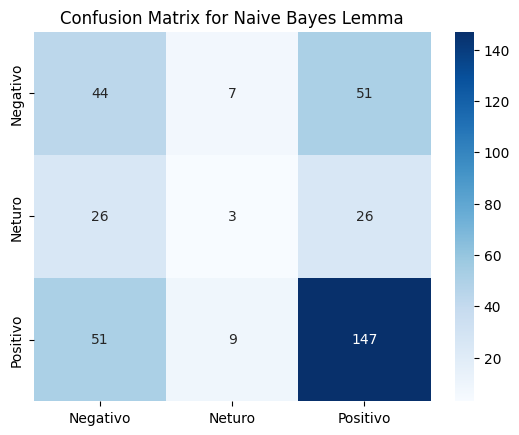

Classification Report for Logistic Regression Lemma:
              precision    recall  f1-score   support

           0       0.39      0.38      0.39       102
           1       0.00      0.00      0.00        55
           2       0.62      0.79      0.70       207

    accuracy                           0.56       364
   macro avg       0.34      0.39      0.36       364
weighted avg       0.47      0.56      0.51       364



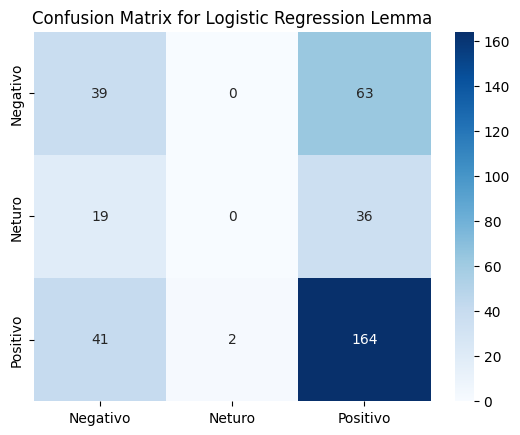

Classification Report for SVM Lemma:
              precision    recall  f1-score   support

           0       0.37      0.37      0.37       102
           1       0.00      0.00      0.00        55
           2       0.63      0.79      0.70       207

    accuracy                           0.55       364
   macro avg       0.33      0.39      0.36       364
weighted avg       0.46      0.55      0.50       364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

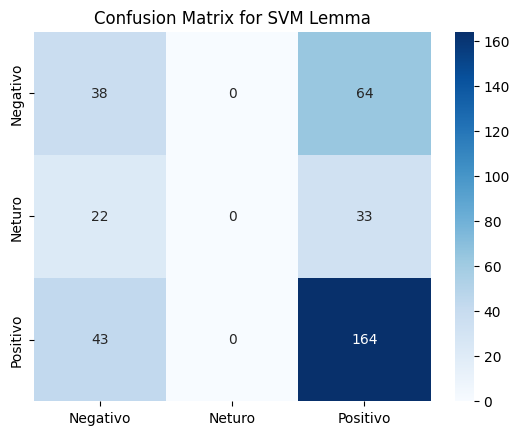

Classification Report for Random Forest Lemma:
              precision    recall  f1-score   support

           0       0.45      0.49      0.47       102
           1       0.00      0.00      0.00        55
           2       0.65      0.80      0.72       207

    accuracy                           0.59       364
   macro avg       0.37      0.43      0.40       364
weighted avg       0.50      0.59      0.54       364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

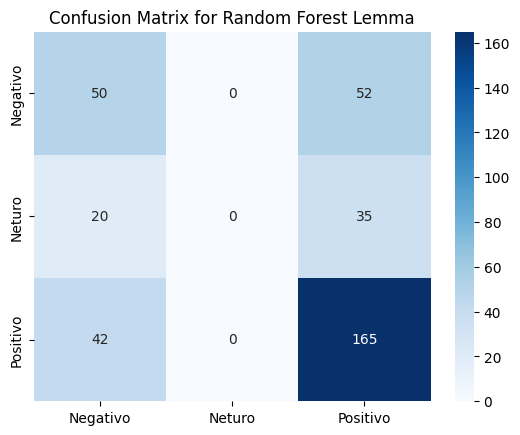

Classification Report for Decision Tree Lemma:
              precision    recall  f1-score   support

           0       0.39      0.57      0.46       102
           1       0.16      0.11      0.13        55
           2       0.66      0.57      0.61       207

    accuracy                           0.50       364
   macro avg       0.40      0.41      0.40       364
weighted avg       0.51      0.50      0.50       364



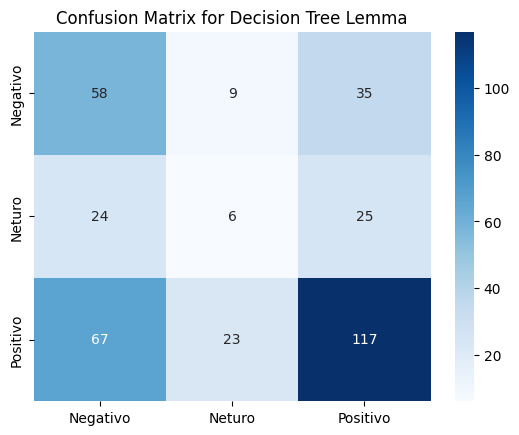

Classification Report for Neural Network Lemma:
              precision    recall  f1-score   support

           0       0.32      0.42      0.37       102
           1       0.19      0.20      0.19        55
           2       0.66      0.55      0.60       207

    accuracy                           0.46       364
   macro avg       0.39      0.39      0.39       364
weighted avg       0.49      0.46      0.47       364



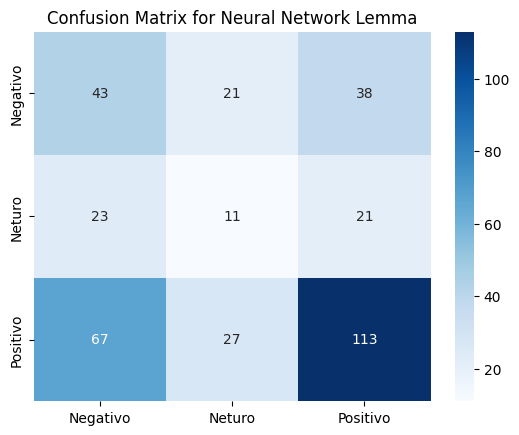

Classification Report for Naive Bayes Not Lemma:
              precision    recall  f1-score   support

           0       0.39      0.47      0.42       102
           1       0.10      0.02      0.03        55
           2       0.63      0.70      0.66       207

    accuracy                           0.53       364
   macro avg       0.37      0.40      0.37       364
weighted avg       0.48      0.53      0.50       364



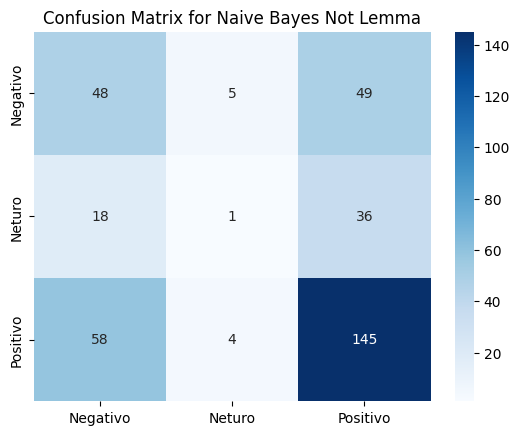

Classification Report for Logistic Regression Not Lemma:
              precision    recall  f1-score   support

           0       0.35      0.38      0.37       102
           1       0.00      0.00      0.00        55
           2       0.60      0.72      0.65       207

    accuracy                           0.52       364
   macro avg       0.32      0.37      0.34       364
weighted avg       0.44      0.52      0.47       364



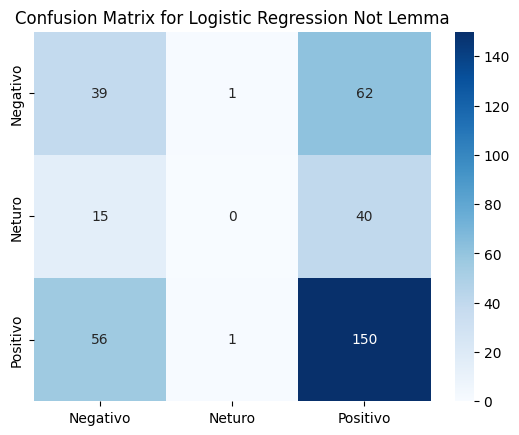

Classification Report for SVM Not Lemma:
              precision    recall  f1-score   support

           0       0.39      0.36      0.38       102
           1       0.00      0.00      0.00        55
           2       0.59      0.77      0.67       207

    accuracy                           0.54       364
   macro avg       0.33      0.38      0.35       364
weighted avg       0.45      0.54      0.49       364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

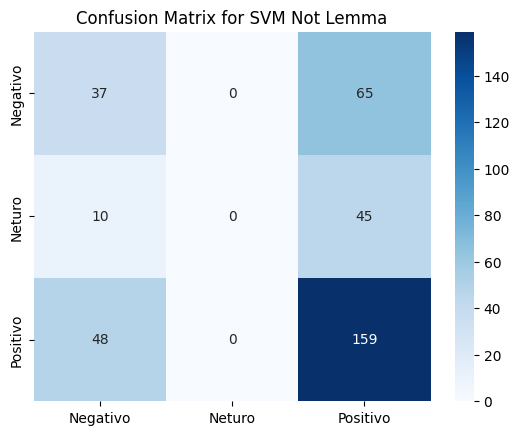

Classification Report for Random Forest Not Lemma:
              precision    recall  f1-score   support

           0       0.34      0.49      0.40       102
           1       0.00      0.00      0.00        55
           2       0.61      0.64      0.63       207

    accuracy                           0.50       364
   macro avg       0.32      0.38      0.34       364
weighted avg       0.44      0.50      0.47       364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

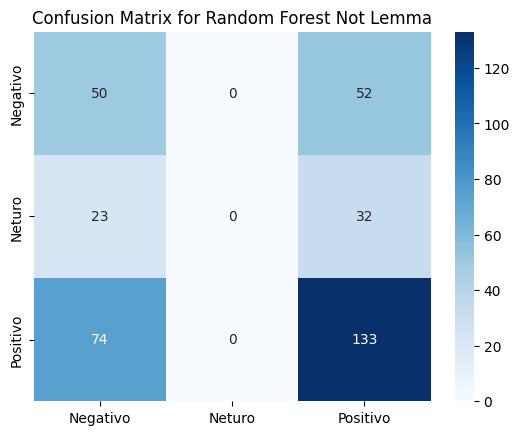

Classification Report for Decision Tree Not Lemma:
              precision    recall  f1-score   support

           0       0.31      0.46      0.37       102
           1       0.21      0.15      0.17        55
           2       0.61      0.51      0.55       207

    accuracy                           0.44       364
   macro avg       0.38      0.37      0.37       364
weighted avg       0.46      0.44      0.45       364



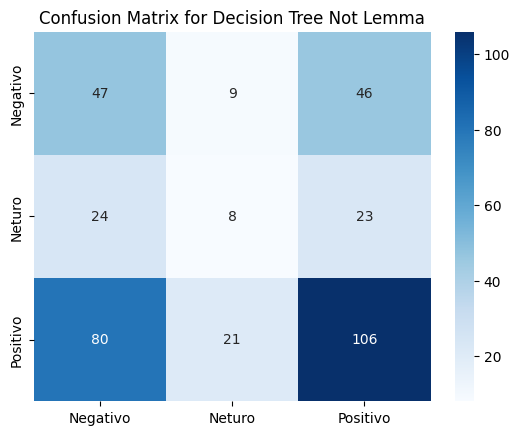

Classification Report for Neural Network Not Lemma:
              precision    recall  f1-score   support

           0       0.31      0.42      0.36       102
           1       0.15      0.07      0.10        55
           2       0.58      0.57      0.57       207

    accuracy                           0.45       364
   macro avg       0.35      0.35      0.34       364
weighted avg       0.44      0.45      0.44       364



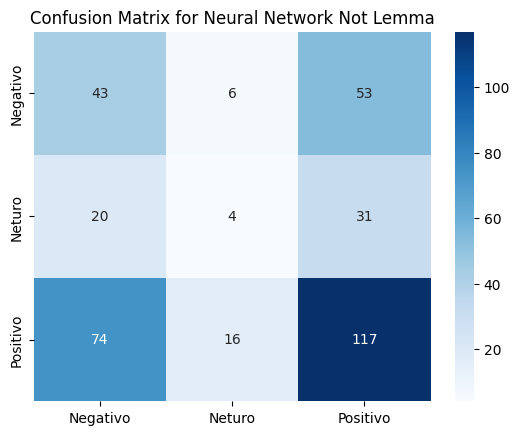

CPU times: user 21.5 s, sys: 9.47 s, total: 31 s
Wall time: 25.4 s


In [19]:
%%time

all_reports = {}
all_dataframe = pd.DataFrame()

for lema_state in ['Lemma', 'Not Lemma']:
    # Los modelos deben ser inicializados cuando cambia el estado de lematizacion
    models = {
    'Naive Bayes': naive_bayes.MultinomialNB(),
    'Logistic Regression': linear_model.LogisticRegression(max_iter=1000, random_state=1),
    'SVM': svm.SVC(random_state=1),
    'Random Forest': ensemble.RandomForestClassifier(random_state=1),
    'Decision Tree': tree.DecisionTreeClassifier(random_state=1),
    'Neural Network': neural_network.MLPClassifier(random_state=1)
    }
    for name, model in models.items():
        Train_X = Train_X_Tfidf_lema if lema_state == 'Lemma' else Train_X_Tfidf
        Test_X = Test_X_Tfidf_lema if lema_state == 'Lemma' else Test_X_Tfidf

        model.fit(Train_X, Train_Y)
        predictions = model.predict(Test_X_Tfidf)

        print(f"Classification Report for {name} {lema_state}:")
        print(classification_report(Test_Y, predictions))

        report_dict = classification_report(Test_Y, predictions, output_dict=True)
        all_reports[f'{name} {lema_state}'] = report_dict

        report_df = pd.DataFrame(report_dict).transpose()
        report_df['model'] = f'{name}'
        report_df['lema state'] = f'{lema_state}'
        all_dataframe = pd.concat([all_dataframe, report_df], axis=0)

        conf_matrix = confusion_matrix(Test_Y, predictions)

        fig, ax = plt.subplots()
        plt.title(f'Confusion Matrix for {name} {lema_state}')
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                    xticklabels={'Negativo': 0,
                                'Neturo': 1,
                                'Positivo': 2},
                    yticklabels={'Negativo': 0,
                                'Neturo': 1,
                                'Positivo': 2})
        plt.show()


# Resultados

In [20]:
all_dataframe.reset_index(inplace=True)
all_dataframe.rename(columns={'index': 'class'}, inplace=True)
all_dataframe = all_dataframe.drop(columns=['support'])
all_dataframe

,class,precision,recall,f1-score,model,lema state
0,0,0.363636,0.431373,0.394619,Naive Bayes,Lemma
1,1,0.157895,0.054545,0.081081,Naive Bayes,Lemma
2,2,0.656250,0.710145,0.682135,Naive Bayes,Lemma
3,accuracy,0.532967,0.532967,0.532967,Naive Bayes,Lemma
4,macro avg,0.392594,0.398688,0.385945,Naive Bayes,Lemma
...,...,...,...,...,...,...
67,1,0.153846,0.072727,0.098765,Neural Network,Not Lemma
68,2,0.582090,0.565217,0.573529,Neural Network,Not Lemma
69,accuracy,0.450549,0.450549,0.450549,Neural Network,Not Lemma
70,macro avg,0.349935,0.353171,0.344042,Neural Network,Not Lemma


## Accuracy


In [21]:
all_dataframe.loc[all_dataframe['class'] == 'accuracy'].sort_values(by=['precision'])

,class,precision,recall,f1-score,model,lema state
63,accuracy,0.442308,0.442308,0.442308,Decision Tree,Not Lemma
69,accuracy,0.450549,0.450549,0.450549,Neural Network,Not Lemma
33,accuracy,0.458791,0.458791,0.458791,Neural Network,Lemma
27,accuracy,0.497253,0.497253,0.497253,Decision Tree,Lemma
57,accuracy,0.502747,0.502747,0.502747,Random Forest,Not Lemma
45,accuracy,0.519231,0.519231,0.519231,Logistic Regression,Not Lemma
3,accuracy,0.532967,0.532967,0.532967,Naive Bayes,Lemma
39,accuracy,0.532967,0.532967,0.532967,Naive Bayes,Not Lemma
51,accuracy,0.538462,0.538462,0.538462,SVM,Not Lemma
15,accuracy,0.554945,0.554945,0.554945,SVM,Lemma
